# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
url = 'http://api.openweathermap.org/data/2.5/weather?q=east london'+'&appid='+weather_api_key
weather_response = requests.get(url)
weather_json = weather_response.json()   

In [4]:
## City ID isn't assigned yet

lat = []
lng = []
temp = []
humidity =[]
clouds = []
wind = []
max_temp = []
cities_ls = []
country = []
date = []
cityid = []
for i in range(len(cities)):
    url = 'http://api.openweathermap.org/data/2.5/weather?q='+cities[i]+'&appid='+weather_api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    try:
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        max_temp.append(weather_json['main']['temp_max'])
        cities_ls.append(weather_json['name'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        cityid.append(i)
        print(f"Processing Record {i} of | {cities[i]}")
    except:
        print("City Data doesn't exist")
        
weather_dict = {
    "City ID":cityid,
    "City": cities_ls,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed":wind
}

Processing Record 0 of | jamestown
Processing Record 1 of | asosa
City Data doesn't exist
Processing Record 3 of | hobart
Processing Record 4 of | saint george
Processing Record 5 of | sherbakul
Processing Record 6 of | castro
Processing Record 7 of | sorland
Processing Record 8 of | esperance
Processing Record 9 of | barrow
City Data doesn't exist
Processing Record 11 of | cape town
City Data doesn't exist
Processing Record 13 of | upernavik
Processing Record 14 of | avarua
Processing Record 15 of | praia da vitoria
Processing Record 16 of | torbay
Processing Record 17 of | jiaojiang
Processing Record 18 of | aripuana
Processing Record 19 of | wabash
City Data doesn't exist
Processing Record 21 of | port alfred
Processing Record 22 of | karakol
Processing Record 23 of | puerto del rosario
Processing Record 24 of | chuy
Processing Record 25 of | kargil
Processing Record 26 of | rikitea
Processing Record 27 of | ushuaia
Processing Record 28 of | collie
Processing Record 29 of | jamame
P

Processing Record 233 of | kaeo
Processing Record 234 of | salalah
Processing Record 235 of | qarchi gak
Processing Record 236 of | oktyabrskoye
Processing Record 237 of | airai
Processing Record 238 of | poum
Processing Record 239 of | svay rieng
Processing Record 240 of | talcahuano
City Data doesn't exist
Processing Record 242 of | bredasdorp
Processing Record 243 of | jipijapa
Processing Record 244 of | lorengau
Processing Record 245 of | lusambo
Processing Record 246 of | kishi
Processing Record 247 of | coquimbo
Processing Record 248 of | willimantic
Processing Record 249 of | praya
Processing Record 250 of | mantua
Processing Record 251 of | bambous virieux
Processing Record 252 of | adrar
Processing Record 253 of | thompson
Processing Record 254 of | kastamonu
Processing Record 255 of | vestmannaeyjar
Processing Record 256 of | saskylakh
Processing Record 257 of | kaputa
Processing Record 258 of | sulangan
Processing Record 259 of | kondoa
Processing Record 260 of | nykoping
Pr

Processing Record 468 of | visby
Processing Record 469 of | souris
Processing Record 470 of | zhanaozen
Processing Record 471 of | ust-ishim
Processing Record 472 of | gimli
Processing Record 473 of | mujiayingzi
Processing Record 474 of | kisesa
Processing Record 475 of | dobsina
Processing Record 476 of | tocopilla
Processing Record 477 of | namibe
Processing Record 478 of | ormara
Processing Record 479 of | villa carlos paz
Processing Record 480 of | chernaya kholunitsa
Processing Record 481 of | the valley
Processing Record 482 of | marang
Processing Record 483 of | nelson bay
Processing Record 484 of | fukue
Processing Record 485 of | sarangani
Processing Record 486 of | rock springs
Processing Record 487 of | bauchi
Processing Record 488 of | yevsino
Processing Record 489 of | hambantota
Processing Record 490 of | mao
Processing Record 491 of | kamenka
Processing Record 492 of | amvrosiyivka
Processing Record 493 of | estelle
Processing Record 494 of | brae
Processing Record 495 

In [5]:
#Date column needs to convert to readable format
weather_data = pd.DataFrame(weather_dict)
weather_data['Max Temp'] = (weather_data['Max Temp']-273.15)*9/5+32
weather_data.head() 

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Jamestown,90,US,1619755274,100,42.0970,-79.2353,46.004,5.66
1,1,Āsosa,100,ET,1619755431,78,10.0667,34.5333,63.266,1.79
2,3,Hobart,20,AU,1619755431,55,-42.8794,147.3294,68.000,2.57
3,4,Saint George,1,US,1619755432,17,37.1041,-113.5841,75.992,1.40
4,5,Sherbakul',0,RU,1619755432,35,54.6316,72.3963,51.800,5.00


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_data.to_csv("Output/city_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_humidityover100=weather_data.loc[weather_data['Humidity'] >100,:]
weather_humidityover100

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
def drawscatterplot(lat, max_temp, xlabel, ylabel, title ):
    plt.scatter(lat,max_temp)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

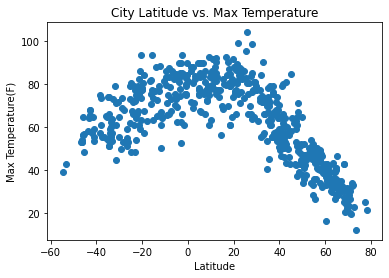

In [10]:
drawscatterplot(weather_data['Lat'],weather_data['Max Temp'],'Latitude','Max Temperature(F)', 'City Latitude vs. Max Temperature')

## Latitude vs. Humidity Plot

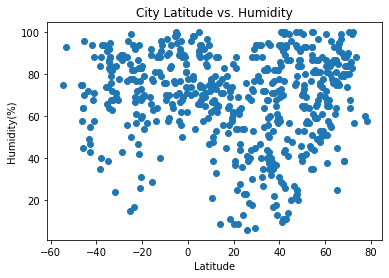

In [11]:
drawscatterplot(weather_data['Lat'],weather_data['Humidity'],'Latitude','Humidity(%)','City Latitude vs. Humidity')

## Latitude vs. Cloudiness Plot

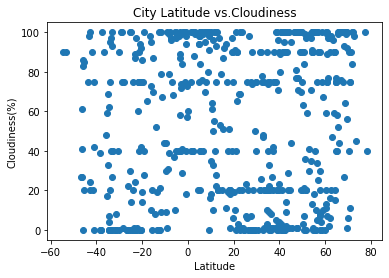

In [12]:
drawscatterplot(weather_data['Lat'],weather_data['Cloudiness'],'Latitude','Cloudiness(%)','City Latitude vs.Cloudiness')

## Latitude vs. Wind Speed Plot

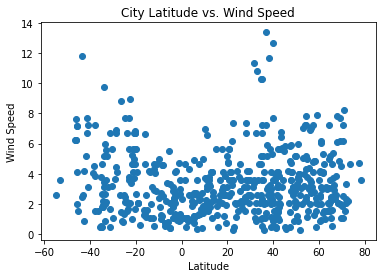

In [13]:
drawscatterplot(weather_data['Lat'],weather_data['Wind Speed'],'Latitude','Wind Speed','City Latitude vs. Wind Speed')

## Linear Regression

In [14]:
weather_data_nh = weather_data.loc[weather_data['Lat']>=0,:]
weather_data_sh = weather_data.loc[weather_data['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
def drawlinreg(x, y, xlabel, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

The r-squared is: 0.7806767213690777


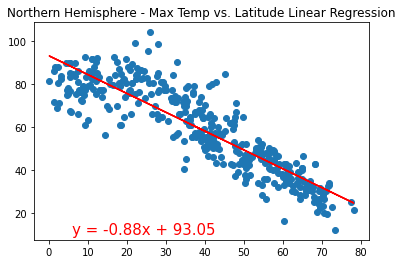

In [22]:
drawlinreg(weather_data_nh['Lat'],weather_data_nh['Max Temp'],'Latitude','Max Temp','Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.41044330789022976


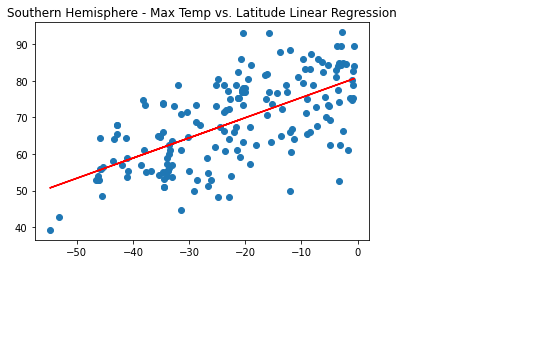

In [23]:
drawlinreg(weather_data_sh['Lat'],weather_data_sh['Max Temp'],'Latitude','Max Temp','Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

#### Analysis for Max Temp vs. Latitude Linear Regression plot:
* For both nothern and southern hemisphere, there is a strong linear relationship between temparture and latitude, the closer the latitude toward to 0, the higher the tempature is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01577904168785981


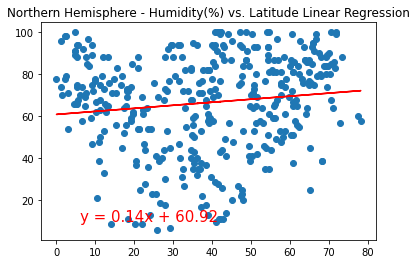

In [24]:
drawlinreg(weather_data_nh['Lat'],weather_data_nh['Humidity'],'Latitude','Humidity(%)','Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.017890766952019594


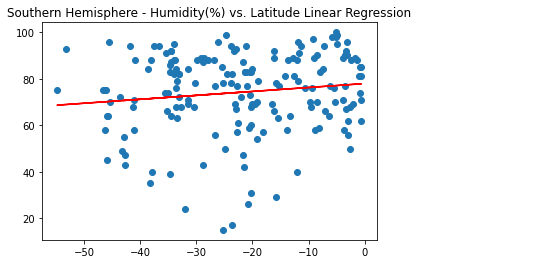

In [25]:
drawlinreg(weather_data_sh['Lat'],weather_data_sh['Humidity'],'Latitude','Humidity(%)','Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0015207381439359309


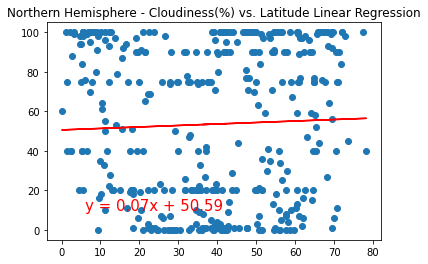

In [26]:
drawlinreg(weather_data_nh['Lat'],weather_data_nh['Cloudiness'],'Latitude','Cloudiness(%)','Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04590859812940924


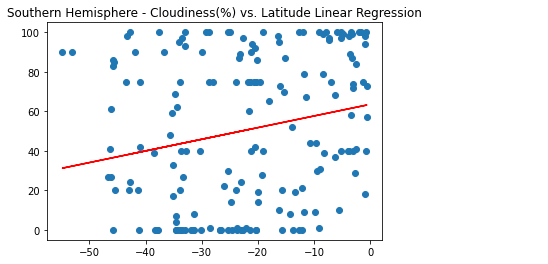

In [27]:
drawlinreg(weather_data_sh['Lat'],weather_data_sh['Cloudiness'],'Latitude','Cloudiness(%)','Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01976605823553725


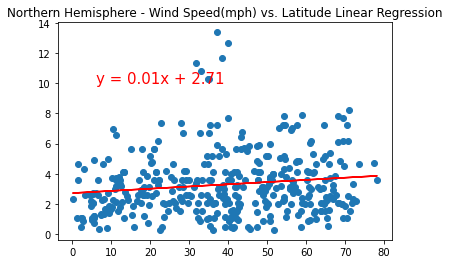

In [28]:
drawlinreg(weather_data_nh['Lat'],weather_data_nh['Wind Speed'],'Latitude','Wind Speed(mph)','Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09978840267789982


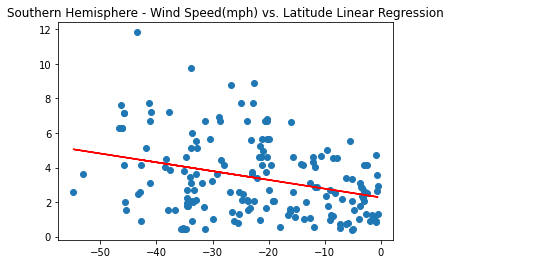

In [29]:
drawlinreg(weather_data_sh['Lat'],weather_data_sh['Wind Speed'],'Latitude','Wind Speed(mph)','Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')